In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)


In [3]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [5]:
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
test_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [7]:
activity_counts = train_data['Activity'].value_counts()
activity_counts

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

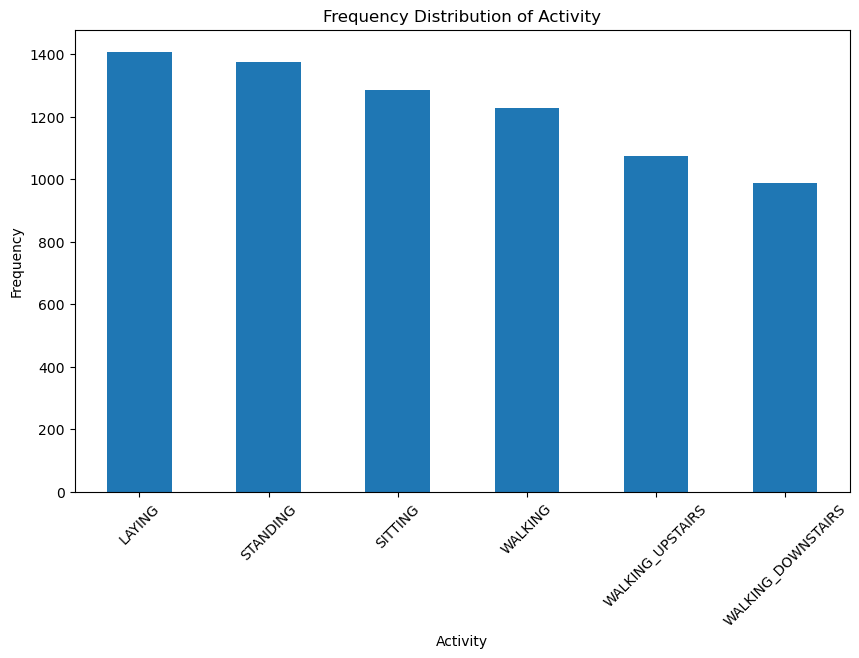

In [8]:
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title('Frequency Distribution of Activity')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [9]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]

x_test,y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

C:\Users\valla\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\valla\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [11]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((2947, 561), (2947,), (7352, 561), (7352,))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

In [13]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64,activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=6,activation='softmax'))
ann.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
ann.fit(x_train,y_train , batch_size=64 ,epochs=100)

Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5202 - loss: 1.2998 
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8305 - loss: 0.6782 
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8852 - loss: 0.4619 
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9052 - loss: 0.3528 
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9186 - loss: 0.2885 
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9276 - loss: 0.2476 
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9320 - loss: 0.2171 
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9332 - loss: 0.1984 
Epoch 9/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9453 - loss: 0.1731 
Epoch 10/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9495 - loss: 0.1567 
Epoch 11/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9548 - loss: 0.1432 
Epoch 12/100
115/115 ━━━━━━━━━

In [14]:
test_loss, test_accuracy = ann.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy} Test Loss: {test_loss}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.1746   
Test Accuracy: 0.9497794508934021 Test Loss: 0.17302721738815308


In [15]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='softmax'))
ann.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
ann.fit(x_train,y_train , batch_size=32 ,epochs=51)

Epoch 1/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5513 - loss: 1.1669     
Epoch 2/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8837 - loss: 0.4393 
Epoch 3/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9028 - loss: 0.2971 
Epoch 4/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9251 - loss: 0.2278 
Epoch 5/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9419 - loss: 0.1822 
Epoch 6/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9527 - loss: 0.1539 
Epoch 7/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9593 - loss: 0.1342 
Epoch 8/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9616 - loss: 0.1194 
Epoch 9/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9635 - loss: 0.1124 
Epoch 10/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9680 - loss: 0.1018  
Epoch 11/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.0872 
Epoch 12/51
230/230 ━━━━━━━━━━━━━━━━

In [16]:
test_loss, test_accuracy = ann.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy} Test Loss: {test_loss}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9542 - loss: 0.1453   
Test Accuracy: 0.9555479884147644 Test Loss: 0.14477629959583282


### Logistic Reg

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
train_predictions = logistic_model.predict(x_train)
from sklearn.metrics import accuracy_score
test_predictions = logistic_model.predict(x_test)
print("Accuracy Score = ",accuracy_score(y_test,test_predictions))

Accuracy Score =  0.9535120461486257


C:\Users\valla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM Linear and Rbf

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)
svm.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [21]:
from sklearn.metrics import recall_score
y_pred_svm = svm.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

recall = recall_score(y_test, y_pred_svm,average='weighted')
print("Recall:", recall)

Accuracy: 0.9613
Recall: 0.9613165931455717


In [22]:
svm = SVC(kernel='rbf', C=1)
svm.fit(x_train, y_train)

SVC(C=1)

In [23]:

y_pred_svm_rbf = svm.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_rbf):.4f}")

recall = recall_score(y_test, y_pred_svm_rbf,average='micro')
print("Recall:", recall)

Accuracy: 0.9481
Recall: 0.9480827960637936


### Descision Tree 

In [25]:
from sklearn.tree import DecisionTreeClassifier
tri = DecisionTreeClassifier(random_state = 42)
tri.fit(x_train,y_train)
y_predict = tri.predict(x_test)

In [26]:
print("Accuracy of the Models is:",accuracy_score(y_test,y_predict))
recall = recall_score(y_test, y_predict,average='weighted')
print("Recall:", recall)

Accuracy of the Models is: 0.8622327790973872
Recall: 0.8622327790973872


### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()

In [29]:
rclf.fit(x_train,y_train)
y_predict_random = rclf.predict(x_test)
accuracy_score(y_test,y_predict_random)

0.9260264675941635

In [30]:
recall = recall_score(y_test, y_predict_random,average='weighted')
print("Recall:", recall)

Recall: 0.9260264675941635
